# Data Analysis Notebook

In [589]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os
import pickle
warnings.filterwarnings('ignore')
%matplotlib inline
from IPython.display import Markdown

## preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler, PowerTransformer

## pipeline
from sklearn.pipeline import Pipeline, FeatureUnion

## Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")



In [590]:
pd.set_option('display.max_columns', None)

# Custom color palette
custom_palette = ["#c7522a", "#fbf2c4", "#008585", "#003f5c", "#58508d", "#ffa600", "#660e60", "#6c584c"]

def theme1():
    plt.style.use('seaborn-v0_8-whitegrid')
    custom_params = {
        'figure.figsize': (15, 6),
        'font.size': 16,
        'font.weight': 'bold',
        'axes.titlesize': 20,
        'axes.labelsize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'axes.spines.top': False,
        'axes.spines.right': False,
    }

    # Set the custom color palette
    sns.set_palette(custom_palette)

    plt.rcParams.update(custom_params)

def theme2():
    plt.style.use('seaborn-v0_8-dark-palette')
    custom_params = {
        'figure.figsize': (15, 6),
        'font.size': 8,
        'font.weight': 'bold',
        'axes.titlesize': 20,
        'axes.labelsize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'axes.spines.top': False,
        'axes.spines.right': False,
    }

    # Set the custom color palette
    sns.set_palette(custom_palette)

    plt.rcParams.update(custom_params)

def doughnuts(data):
    # Create a pie plot
    plt.pie(x=data.values, labels=data.index, autopct='%.2f%%', shadow=True, startangle=90)
    plt.axis('equal')
    my_circle = plt.Circle((0, 0), 0.7, color='white')
    p = plt.gcf()
    p.gca().add_artist(my_circle)

    return p

theme1()


seaborn_palette = sns.color_palette(custom_palette,n_colors=8)
sns.set_palette(custom_palette)
plt.show()


In [591]:
seaborn_palette

[(0.7803921568627451, 0.3215686274509804, 0.16470588235294117),
 (0.984313725490196, 0.9490196078431372, 0.7686274509803922),
 (0.0, 0.5215686274509804, 0.5215686274509804),
 (0.0, 0.24705882352941178, 0.3607843137254902),
 (0.34509803921568627, 0.3137254901960784, 0.5529411764705883),
 (1.0, 0.6509803921568628, 0.0),
 (0.4, 0.054901960784313725, 0.3764705882352941),
 (0.4235294117647059, 0.34509803921568627, 0.2980392156862745)]

In [592]:
df = pd.read_csv(r'../data/data.csv', na_values=[0,' ','','--', 'nan','Unknown'])

In [593]:
df.head()

,Unnamed: 0,id,job_title,job_location,job_description,company_name,company_size,company_founde,company_type,company_industry,company_sector,company_revenue,stars,min_salary,max_salary
0,NaN,3fd3d844120f9a198fa1d7220204c6d8,Junior Data Analyst,Montreal,Cosmetic Physician Partners is building the le...,Cosmetic Physician Partners,NaN,4.3,4.3,NaN,NaN,NaN,4.0,49000.0,76000.0
1,1.0,3f668f68bbdbea01a19744b7800f9f9e,Data Analyst,Vaughan,Job Title: Data Analyst\nJoin Our Team as a Da...,Novitech Inc.,NaN,NaN,NaN,NaN,Search,NaN,NaN,48000.0,NaN
2,2.0,8e12e3037980fd899c126b27de220b15,Data Analyst,Richmond,Job Title: Data Analyst\nJoin Our Team as a Da...,Vanbuy Technology Ltd.,NaN,NaN,NaN,NaN,Search,NaN,NaN,42.0,47.0
3,3.0,ca3d308523cb617c9356a85ba3a002e3,Data Modeler/Data Analyst,"Fairfax, VA","Responsibilities:\n· Designs, implements, and ...",Freddie Mac,NaN,3.5,3.5,NaN,NaN,NaN,4.0,70.0,75.0
4,4.0,7ce0fdd4b0f0326bec173105a5392f58,Data Analyst,"California, MD",The Organization: Sierra Management and Techno...,"Sierra Management and Technologies, Inc",NaN,4.4,4.4,NaN,NaN,NaN,4.0,55000.0,85000.0


In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1582 non-null   float64
 1   id                1583 non-null   object 
 2   job_title         1582 non-null   object 
 3   job_location      1583 non-null   object 
 4   job_description   1583 non-null   object 
 5   company_name      1583 non-null   object 
 6   company_size      1284 non-null   float64
 7   company_founde    980 non-null    float64
 8   company_type      1411 non-null   object 
 9   company_industry  1193 non-null   object 
 10  company_sector    1347 non-null   object 
 11  company_revenue   773 non-null    float64
 12  stars             1277 non-null   float64
 13  min_salary        1344 non-null   float64
 14  max_salary        1199 non-null   float64
dtypes: float64(7), object(8)
memory usage: 185.6+ KB


In [595]:
df.describe()

,Unnamed: 0,company_size,company_founde,company_revenue,stars,min_salary,max_salary
count,1582.000000,1284.000000,980.000000,7.730000e+02,1277.000000,1344.000000,1199.000000
mean,791.500000,2921.524143,1961.960408,4.360984e+10,4.358653,59784.761905,88318.014178
std,456.828378,4081.114378,121.962547,1.349188e+11,16.804513,37749.921039,49490.717627
min,1.000000,1.000000,3.500000,1.000000e+06,1.000000,14.000000,20.000000
25%,396.250000,51.000000,1946.000000,5.000000e+07,4.000000,47000.000000,69500.000000
50%,791.500000,501.000000,1988.000000,5.000000e+09,4.000000,62000.000000,88000.000000
75%,1186.750000,5001.000000,2007.000000,1.000000e+10,4.000000,80000.000000,117000.000000
max,1582.000000,10000.000000,2023.000000,5.000000e+11,604.000000,202000.000000,332000.000000


++++++++++++++++++++++++++++++++++++++++++++++
Unnamed: 0==>0.06% | job_title==>0.06% | company_size==>18.89% | company_founde==>38.09% | company_type==>10.87% | company_industry==>24.64% | company_sector==>14.91% | company_revenue==>51.17% | stars==>19.33% | min_salary==>15.1% | max_salary==>24.26% | 
++++++++++++++++++++++++++++++++++++++++++++++


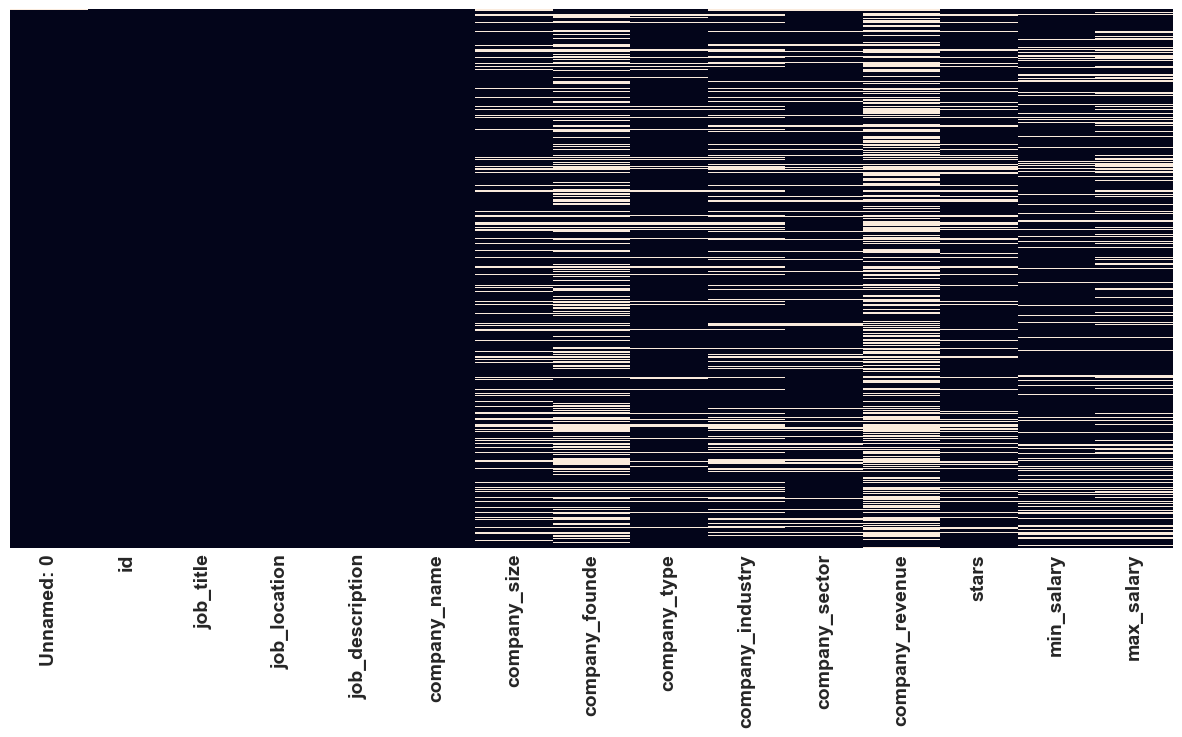

In [596]:
def null_percent(col):
    percentage = round(col.isnull().sum()/len(col)*100,2)
    if percentage > 0:
        print(f'{col.name}==>{percentage}% |', end=' ')
print('+'*46)
df.apply(null_percent)
print()
print('+'*46)
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
plt.show()



In [597]:
df.columns

Index(['Unnamed: 0', 'id', 'job_title', 'job_location', 'job_description',
       'company_name', 'company_size', 'company_founde', 'company_type',
       'company_industry', 'company_sector', 'company_revenue', 'stars',
       'min_salary', 'max_salary'],
      dtype='object')

## Univariate Analysis

## Numerical Features

> Unnamed: 0

In [598]:
df['Unnamed: 0'].describe()

count    1582.000000
mean      791.500000
std       456.828378
min         1.000000
25%       396.250000
50%       791.500000
75%      1186.750000
max      1582.000000
Name: Unnamed: 0, dtype: float64

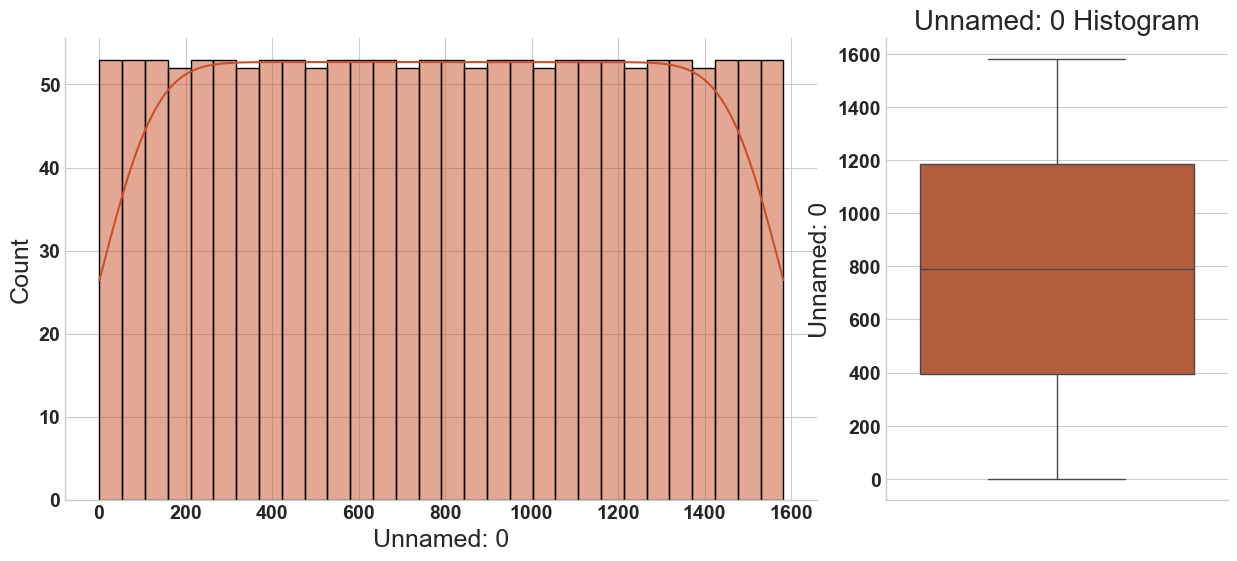

In [599]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='Unnamed: 0', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['Unnamed: 0'],ax=ax['box'])
plt.title('Unnamed: 0 Histogram')
plt.show()


----

> company_size

In [600]:
df['company_size'].describe()

count     1284.000000
mean      2921.524143
std       4081.114378
min          1.000000
25%         51.000000
50%        501.000000
75%       5001.000000
max      10000.000000
Name: company_size, dtype: float64

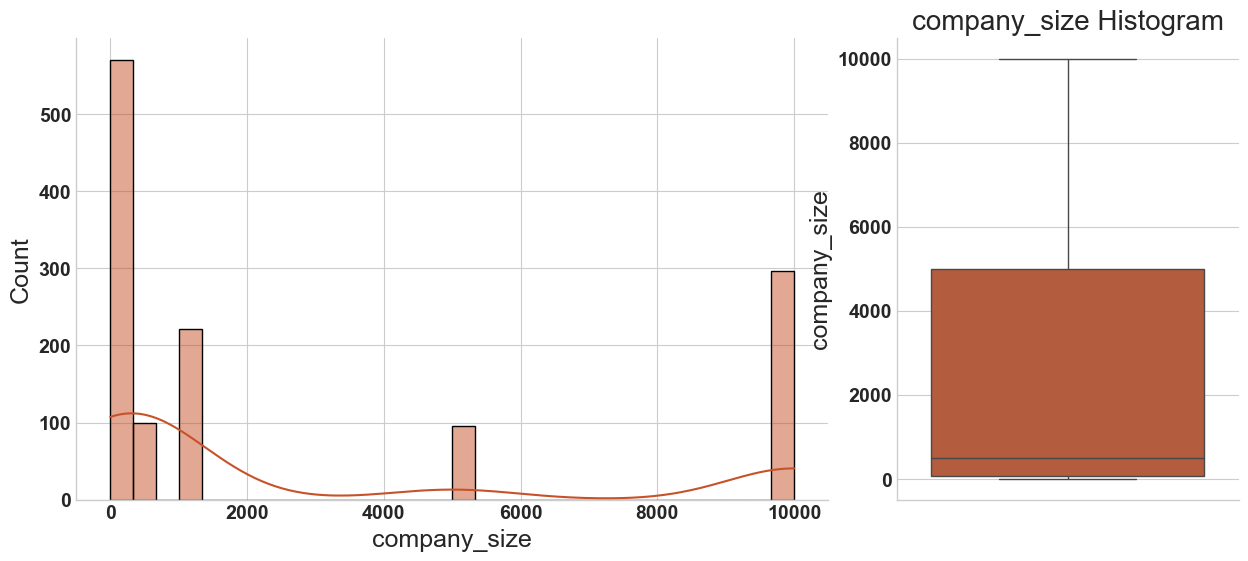

In [601]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='company_size', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['company_size'],ax=ax['box'])
plt.title('company_size Histogram')
plt.show()


In [602]:
## company Size dont have zero values
df['company_size'].describe()

count     1284.000000
mean      2921.524143
std       4081.114378
min          1.000000
25%         51.000000
50%        501.000000
75%       5001.000000
max      10000.000000
Name: company_size, dtype: float64

----

> company_revenue

In [603]:
df['company_revenue'].describe()

count    7.730000e+02
mean     4.360984e+10
std      1.349188e+11
min      1.000000e+06
25%      5.000000e+07
50%      5.000000e+09
75%      1.000000e+10
max      5.000000e+11
Name: company_revenue, dtype: float64

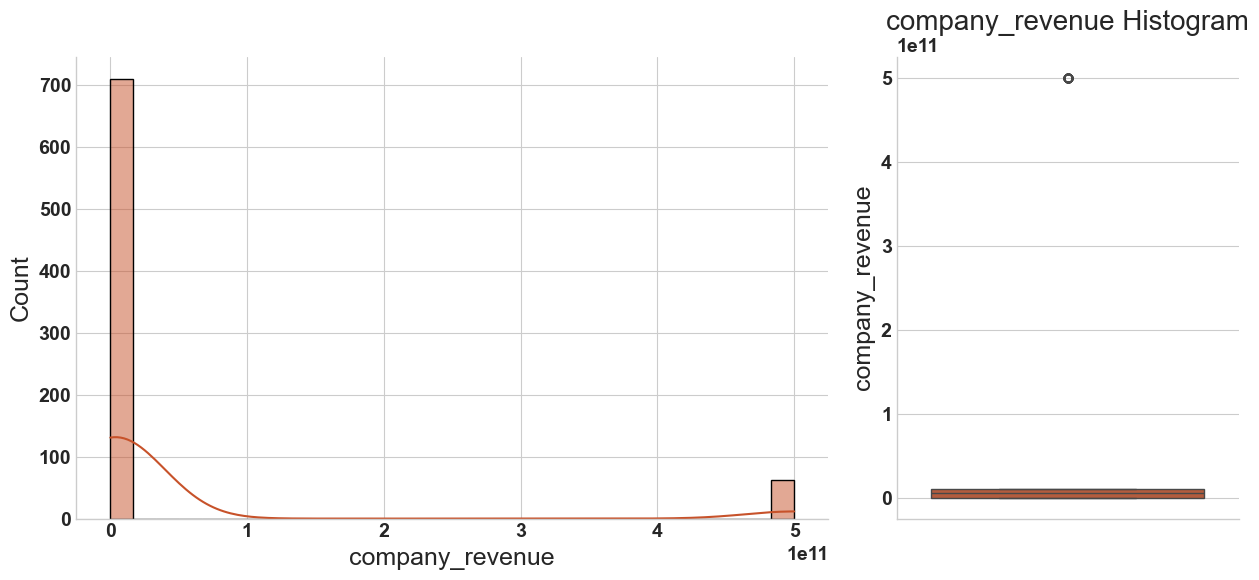

In [604]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='company_revenue', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['company_revenue'],ax=ax['box'])
plt.title('company_revenue Histogram')
plt.show()


In [605]:
df['company_revenue'].unique()

array([    nan, 5.0e+09, 1.0e+10, 5.0e+06, 5.0e+11, 5.0e+08, 5.0e+07,
       1.0e+06, 2.5e+07])

-----

> stars

In [606]:
df['stars'].describe()

count    1277.000000
mean        4.358653
std        16.804513
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max       604.000000
Name: stars, dtype: float64

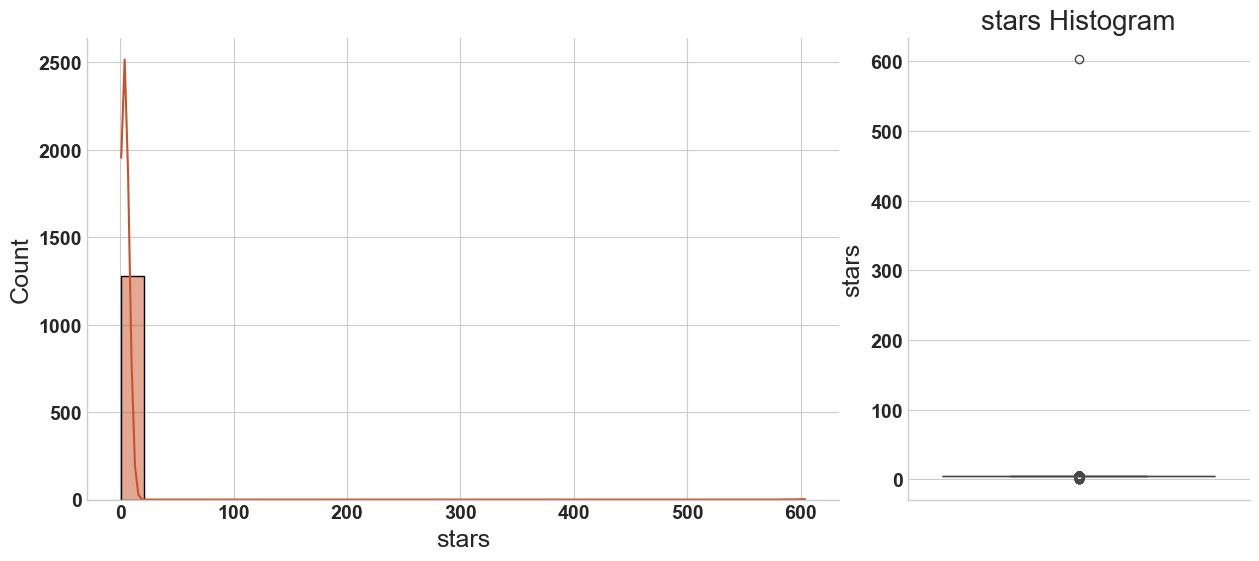

In [607]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='stars', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['stars'],ax=ax['box'])
plt.title('stars Histogram')
plt.show()


-----

> min_salary

In [608]:
df['min_salary'].describe()

count      1344.000000
mean      59784.761905
std       37749.921039
min          14.000000
25%       47000.000000
50%       62000.000000
75%       80000.000000
max      202000.000000
Name: min_salary, dtype: float64

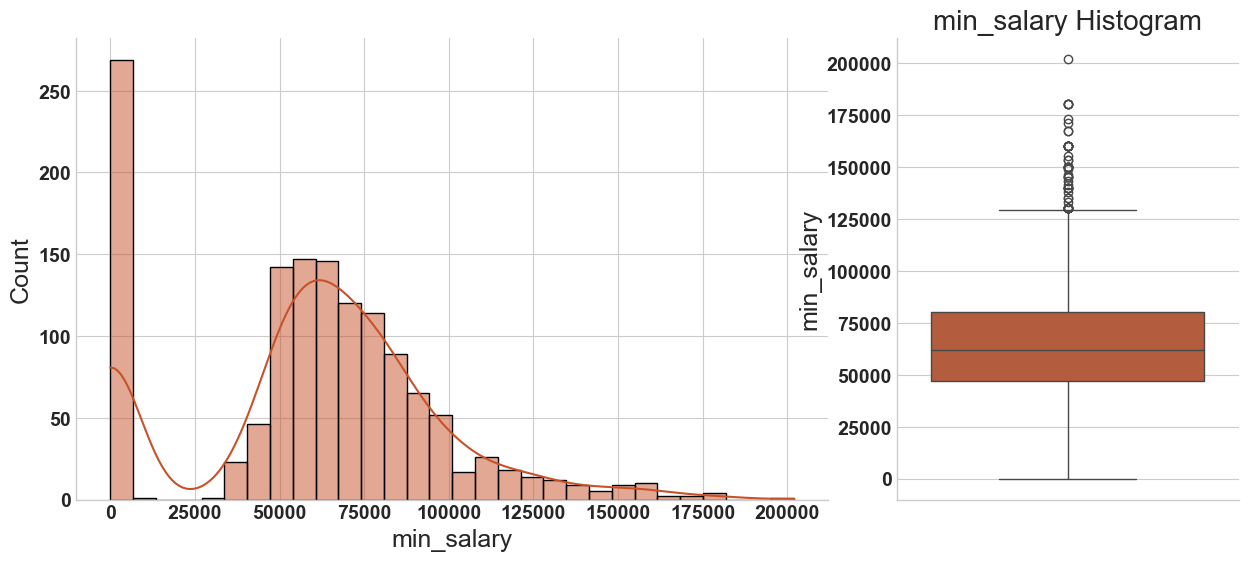

In [609]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='min_salary', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['min_salary'],ax=ax['box'])
plt.title('min_salary Histogram')
plt.show()


> max_salary

In [610]:
df['max_salary'].describe()

count      1199.000000
mean      88318.014178
std       49490.717627
min          20.000000
25%       69500.000000
50%       88000.000000
75%      117000.000000
max      332000.000000
Name: max_salary, dtype: float64

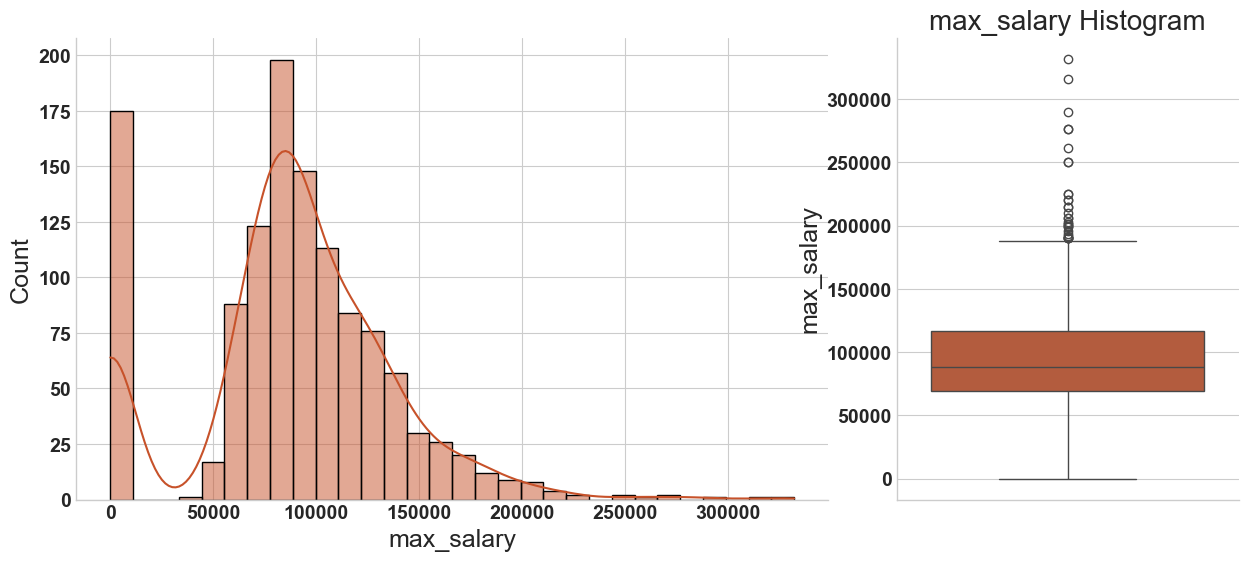

In [611]:

fig,ax = plt.subplot_mosaic([['hist','hist','box']])
sns.histplot(data=df, x='max_salary', bins=30, kde=True, ax=ax['hist'])
sns.boxplot(df['max_salary'],ax=ax['box'])
plt.title('max_salary Histogram')
plt.show()


## Categorical Features

> company_type

In [612]:
df['company_type'].describe()

count                  1411
unique                   15
top       Company - Private
freq                    732
Name: company_type, dtype: object

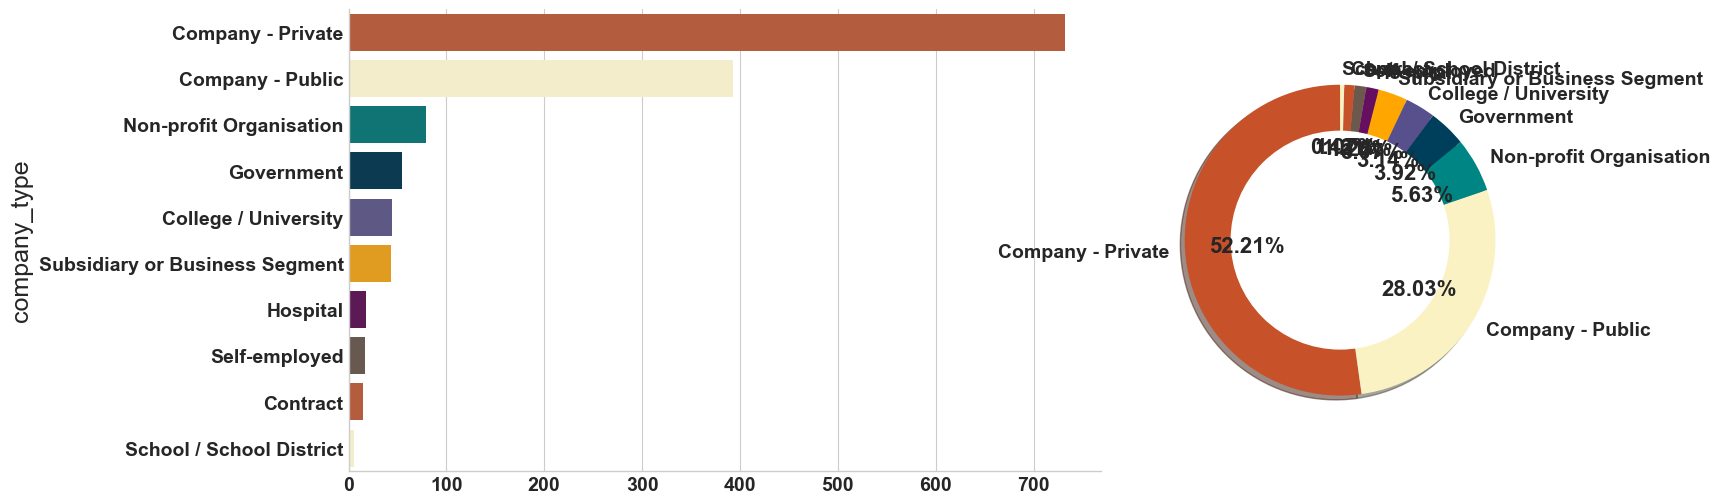

In [613]:

fig,ax = plt.subplot_mosaic([['hist','hist','doughnut']])
g= df['company_type'].value_counts().head(10)
sns.barplot(y=g.index , x=g.values, ax=ax['hist'],palette=custom_palette)
ax['doughnut']=doughnuts(g)
plt.show()


> company_sector

In [614]:
df['company_sector'].describe()

count                       1347
unique                        26
top       Information Technology
freq                         322
Name: company_sector, dtype: object

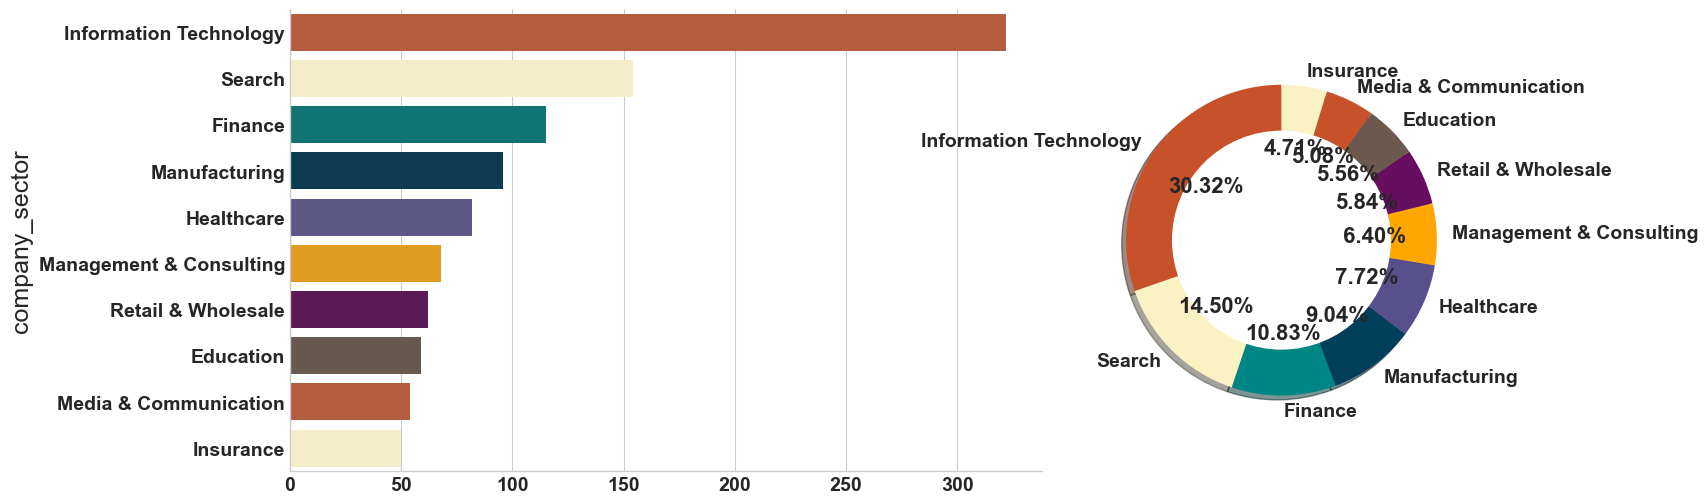

In [615]:

fig,ax = plt.subplot_mosaic([['hist','hist','doughnut']])
g= df['company_sector'].value_counts().head(10)
sns.barplot(y=g.index , x=g.values, ax=ax['hist'],palette=custom_palette)
ax['doughnut']=doughnuts(g)
plt.show()



## Numerical Features With Errors

> id

In [616]:
df['id'].describe()

count                                 1583
unique                                1583
top       1b54b90acf4c729c0f4648b95a9d27ac
freq                                     1
Name: id, dtype: object

In [617]:
df['id'].unique()

array(['3fd3d844120f9a198fa1d7220204c6d8',
       '3f668f68bbdbea01a19744b7800f9f9e',
       '8e12e3037980fd899c126b27de220b15', ...,
       '8974bb42835dfc4ae66e5675bf0a32c6',
       'afa0b84f534b26abf5015b2e831377f7',
       '1b54b90acf4c729c0f4648b95a9d27ac'], dtype=object)

> job_title

In [618]:
df['job_title'].describe()

count               1582
unique               805
top       Data Scientist
freq                 204
Name: job_title, dtype: object

In [619]:
df['job_title'].unique()

array(['Junior Data Analyst', 'Data Analyst', 'Data Modeler/Data Analyst',
       'Data Quality Analyst', 'Data Analytics Analyst',
       'Business Data Analyst', 'Healthcare Data Analyst',
       'Credit Data Analyst (Remote)', 'Data Analyst - Decision Support',
       'Business Intelligence Analyst', 'IT Data Analyst Jr',
       'Data Analyst (Exadata & Hadoop) - Remote',
       'Data Business Analyst/Insights Analyst',
       'Data Analyst (Excel) 5769-16',
       'Data Analyst (hybrid; Sarnia or Strathroy)', 'Data Analyst II',
       'Operational Data Analyst', 'Data Management Analyst',
       'Data Business Analyst', 'Data & Research Analyst',
       'Data Quality Analyst (1-Year Contract)',
       'Data Analyst, Contacts Focused',
       'Data Analyst / Business Analyst',
       'Data Analyst - OpenRoad Auto Group', 'Operations Data Analyst',
       'Data Operations Analyst', 'Data & Policy Analyst',
       'Database Analyst', 'Jr. CRM Data Analyst',
       'Artificial intellig

> job_location

In [620]:
df['job_location'].describe()

count        1583
unique        493
top       Toronto
freq          152
Name: job_location, dtype: object

In [621]:
df['job_location'].unique()

array(['Montreal', 'Vaughan', 'Richmond', 'Fairfax, VA', 'California, MD',
       'Menlo Park, CA', 'Lincolnshire, IL', 'Calgary', 'Mississauga',
       'Edmonton', 'Burlington', 'Toronto', 'Remote', 'Stratford',
       'London', 'Vancouver', 'Markham', 'Aurora', 'Dartmouth',
       'Strathroy', 'Arthur', 'Halifax', 'Brantford', 'Victoria',
       'Grande Prairie', 'Canada', 'Kitchener', 'Brampton', 'Surrey',
       'Ottawa', 'North York', 'Etobicoke', 'Niagara Falls',
       'Fort Saskatchewan', 'North Vancouver', 'Burnaby', 'Abbotsford',
       'Newmarket', 'Hamilton', 'Regina', 'Kelowna', 'Fredericton',
       'Tiverton', 'St. Catharines', 'Concord', 'Headquarters',
       'Thornhill', 'Emo', 'Orillia', 'Oshawa', 'Tsawwassen',
       'Coteau-du-Lac', 'Whitby', 'Guelph', 'Waterloo', 'Chatham-Kent',
       'Charlottetown', 'Cambridge', 'Sault Ste. Marie',
       'Midtown Toronto', 'Richmond Hill', 'Leduc', 'Engineer', 'Chesley',
       'LaSalle', 'Sherbrooke', 'Alberta', 'Austin, TX',

> job_description

In [622]:
df['job_description'].describe()

count                                                  1583
unique                                                 1583
top       Do the best work of your career, helping busin...
freq                                                      1
Name: job_description, dtype: object

In [623]:
df['job_description'].unique()

array(['Cosmetic Physician Partners is building the leading network of physician-led medical aesthetic clinics in America. By supporting our clinics with a world-class leadership team, market-leading support services, and an iconic brand experience, we deliver remarkable results that improve the lives of our clients and team members.\nWe are currently looking to hire a highly analytical and detail-oriented professional to join our team in the role of Junior Data Analyst.\n\nSchedule: Full-time, Hybrid - 3 days onsite, 2 days remote\n\nResponsibilities:\nExtracting data using specialized tools and Software.\nSetting up processes to make data more efficient.\nBuild out Reports for analyzing Clinic Profit.\nUtilize advanced data analytics techniques to gather, analyze, and interpret patient retention, deriving valuable insights that inform strategic decisions.\nDevelop a deep understanding of the Cosmetic business: identify, track, and communicate current/future trends and cost drivers in

> company_name

In [624]:
df['company_name'].describe()

count                  1583
unique                 1350
top       Dawn InfoTek Inc.
freq                     14
Name: company_name, dtype: object

In [625]:
df['company_name'].unique()

array(['Cosmetic Physician Partners', 'Novitech Inc.',
       'Vanbuy Technology Ltd.', ...,
       'Woods Hole Oceanographic Institution',
       'Arkansas Blue Cross and Blue Shield', 'Redcloud Consulting'],
      dtype=object)

> company_founde

In [626]:
df['company_founde'].describe()

count     980.000000
mean     1961.960408
std       121.962547
min         3.500000
25%      1946.000000
50%      1988.000000
75%      2007.000000
max      2023.000000
Name: company_founde, dtype: float64

In [627]:
df['company_founde'].unique()

array([   4.3,    nan,    3.5,    4.4, 1966. , 2019. , 2021. , 1959. ,
       2012. , 2013. , 1865. , 1943. , 1995. , 1983. , 1980. , 2005. ,
       1869. , 1969. , 2000. , 2023. , 1997. , 1898. , 1957. , 1906. ,
       1948. , 1958. , 2015. , 1999. , 1926. , 2016. , 2009. , 1994. ,
       1974. , 1998. , 1982. , 1894. , 1950. , 2014. , 1946. , 1927. ,
       1817. , 2002. , 1827. , 1970. , 1977. , 1981. , 1940. , 1989. ,
       2004. , 1984. , 1992. , 1880. , 1978. , 1904. , 1967. , 2018. ,
       2006. , 1987. , 1976. , 1922. , 1996. , 1973. , 2007. , 1850. ,
       1990. , 1972. , 2017. , 2008. , 1986. , 1889. , 1939. , 1955. ,
       1949. , 1911. , 1991. , 1985. , 1887. , 1890. , 1993. , 1867. ,
       1937. , 2001. , 1915. , 1905. , 1975. , 2011. , 1855. , 1902. ,
       2010. , 1968. , 1936. , 1938. , 1988. , 1960. , 1885. , 1951. ,
       1907. , 1971. , 1832. , 1965. , 1924. , 1912. , 1881. , 1953. ,
       1903. , 2003. , 1944. , 1954. , 1945. , 1923. , 2020. , 1952. ,
      

In [628]:
df[df['company_founde'].isin([4.3,3.5,4.4])]

,Unnamed: 0,id,job_title,job_location,job_description,company_name,company_size,company_founde,company_type,company_industry,company_sector,company_revenue,stars,min_salary,max_salary
0,NaN,3fd3d844120f9a198fa1d7220204c6d8,Junior Data Analyst,Montreal,Cosmetic Physician Partners is building the le...,Cosmetic Physician Partners,NaN,4.3,4.3,NaN,NaN,NaN,4.0,49000.0,76000.0
3,3.0,ca3d308523cb617c9356a85ba3a002e3,Data Modeler/Data Analyst,"Fairfax, VA","Responsibilities:\n· Designs, implements, and ...",Freddie Mac,NaN,3.5,3.5,NaN,NaN,NaN,4.0,70.0,75.0
4,4.0,7ce0fdd4b0f0326bec173105a5392f58,Data Analyst,"California, MD",The Organization: Sierra Management and Techno...,"Sierra Management and Technologies, Inc",NaN,4.4,4.4,NaN,NaN,NaN,4.0,55000.0,85000.0


In [629]:
df.describe()

,Unnamed: 0,company_size,company_founde,company_revenue,stars,min_salary,max_salary
count,1582.000000,1284.000000,980.000000,7.730000e+02,1277.000000,1344.000000,1199.000000
mean,791.500000,2921.524143,1961.960408,4.360984e+10,4.358653,59784.761905,88318.014178
std,456.828378,4081.114378,121.962547,1.349188e+11,16.804513,37749.921039,49490.717627
min,1.000000,1.000000,3.500000,1.000000e+06,1.000000,14.000000,20.000000
25%,396.250000,51.000000,1946.000000,5.000000e+07,4.000000,47000.000000,69500.000000
50%,791.500000,501.000000,1988.000000,5.000000e+09,4.000000,62000.000000,88000.000000
75%,1186.750000,5001.000000,2007.000000,1.000000e+10,4.000000,80000.000000,117000.000000
max,1582.000000,10000.000000,2023.000000,5.000000e+11,604.000000,202000.000000,332000.000000


In [630]:
df['company_founde']

0          4.3
1          NaN
2          NaN
3          3.5
4          4.4
         ...  
1578       NaN
1579    1948.0
1580    1995.0
1581       NaN
1582    2006.0
Name: company_founde, Length: 1583, dtype: float64

> company_industry

In [631]:
df['company_industry'].describe()

count                                        1193
unique                                         96
top       Information Technology Support Services
freq                                          154
Name: company_industry, dtype: object

#  Solve Columns Problems

- __min and max salary:__ deal with null values

In [632]:
df.loc[df['max_salary'].isna() & df['min_salary'], 'max_salary'] =df['min_salary']


In [633]:
# The min and max salaries have such small values because this salary may be per hour, not per month.

df.loc[df['min_salary'] < 100, 'min_salary'] = df['min_salary'] * 1000 
df.loc[df['max_salary'] < 100, 'max_salary'] = df['max_salary'] * 1000 



In [634]:
df.dropna(subset=['min_salary','max_salary'],inplace=True)



- __company_type__

In [635]:

df.loc[df['company_type'].isin(['4.4','3.5','4.3','nan']), 'company_type'] = np.nan


# __Answer some questoins__

- > __How does the salary range vary with company size?__

In [636]:
df.groupby('company_size')['min_salary'].min()

company_size
1.0         5000.0
51.0        7000.0
201.0      29000.0
501.0      14000.0
1001.0      4000.0
5001.0     26000.0
10000.0     5000.0
Name: min_salary, dtype: float64

In [637]:

bin_edges = [0, 500, 1000, float('inf')]
bin_labels = ['Small', 'Medium', 'Large']

df['company_size'] = pd.cut(df['company_size'], bins=bin_edges, labels=bin_labels)

print(df['company_size'].unique())

[NaN, 'Small', 'Large', 'Medium']
Categories (3, object): ['Small' < 'Medium' < 'Large']


In [638]:

company_size_categories = ['Small', 'Medium', 'Large']
grouped_data = df.groupby('company_size')

salary_range_stats = grouped_data[['min_salary', 'max_salary']].agg(['min', 'max', 'mean'])


In [639]:
salary_range_stats

min_salary                         max_salary            \
                    min       max          mean        min       max   
company_size                                                           
Small            5000.0  180000.0  68014.553015      100.0  250000.0   
Medium          14000.0  160000.0  69205.128205    14000.0  225000.0   
Large            4000.0  202000.0  70769.961977     6000.0  332000.0   

                            
                      mean  
company_size                
Small         90533.264033  
Medium        93346.153846  
Large         97254.752852

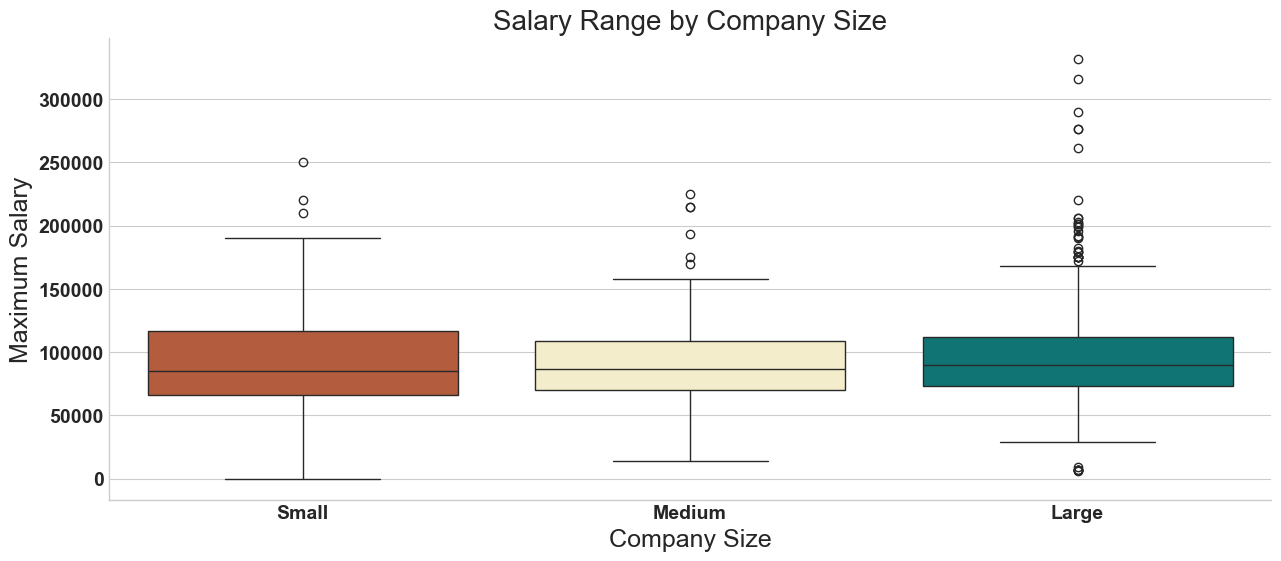

min_salary                         max_salary            \
                    min       max          mean        min       max   
company_size                                                           
Small            5000.0  180000.0  68014.553015      100.0  250000.0   
Medium          14000.0  160000.0  69205.128205    14000.0  225000.0   
Large            4000.0  202000.0  70769.961977     6000.0  332000.0   

                            
                      mean  
company_size                
Small         90533.264033  
Medium        93346.153846  
Large         97254.752852

In [640]:

sns.boxplot(x='company_size', y='max_salary', data=df, palette=custom_palette)
plt.title('Salary Range by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Maximum Salary')
plt.show()

# Print the salary range statistics
salary_range_stats


- > The industries or sectors with the highest demand:

In [641]:
industry_demand = df['company_industry'].value_counts()

# Get the industry with the highest demand
highest_demand_industry = industry_demand.idxmax()

print("The industry with the highest demand:")
print(highest_demand_industry)


The industry with the highest demand:
Information Technology Support Services


- > The geographic distribution of job opportunities:

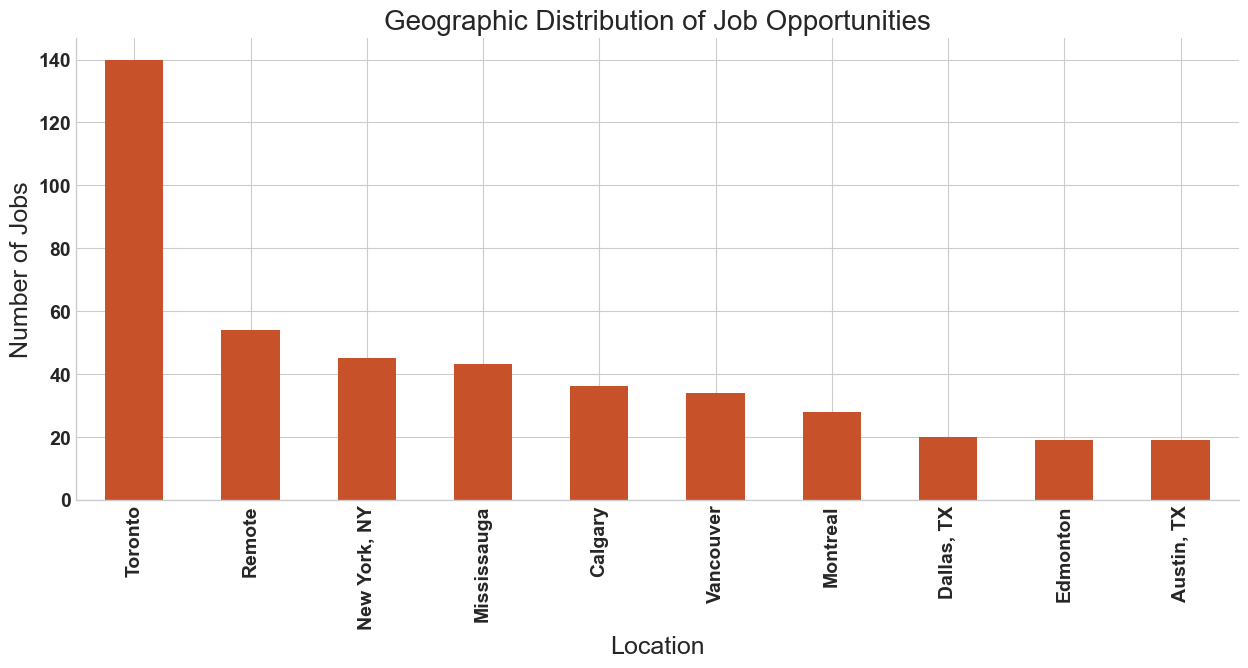

In [642]:
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
location_distribution = df['job_location'].value_counts()

location_distribution.head(10).plot(kind='bar')
plt.title("Geographic Distribution of Job Opportunities")
plt.xlabel("Location")
plt.ylabel("Number of Jobs")
plt.show()


# Feature Engineering

- __Deal with Outliers__

In [643]:
def get_outliers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    max_val = col[(col >= lower_bound) & (col <= upper_bound)].max()
    col[(col < lower_bound) | (col > upper_bound)] = max_val
    return col

columns_to_process = ['min_salary','max_salary']
df[columns_to_process] = df[columns_to_process].apply(get_outliers, axis=0)

In [644]:
def title_transformer(title):
    try:
        if 'analyst' in title.lower():
            return 'data analyst'
        elif 'scientist' in title.lower():
            return 'data scientist'
        elif 'analysis' in title.lower():
            return 'data analyst'
    except:
        return None


In [645]:
df['job_title'] = df['job_title'].apply(title_transformer)

In [646]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1344 entries, 0 to 1582
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        1343 non-null   float64 
 1   id                1344 non-null   object  
 2   job_title         1322 non-null   object  
 3   job_location      1344 non-null   object  
 4   job_description   1344 non-null   object  
 5   company_name      1344 non-null   object  
 6   company_size      1085 non-null   category
 7   company_founde    828 non-null    float64 
 8   company_type      1201 non-null   object  
 9   company_industry  1013 non-null   object  
 10  company_sector    1140 non-null   object  
 11  company_revenue   664 non-null    float64 
 12  stars             1079 non-null   float64 
 13  min_salary        1344 non-null   float64 
 14  max_salary        1344 non-null   float64 
dtypes: category(1), float64(6), object(8)
memory usage: 158.9+ KB


In [647]:
df['job_title'].unique()

array(['data analyst', None, 'data scientist'], dtype=object)

In [648]:
num_cols = df.select_dtypes(include='number').columns.tolist()
categ_cols = df.select_dtypes(exclude='number').columns.tolist()

print('Numerical Columns \t', num_cols)
print('Categorical Columns \t', categ_cols)

Numerical Columns 	 ['Unnamed: 0', 'company_founde', 'company_revenue', 'stars', 'min_salary', 'max_salary']
Categorical Columns 	 ['id', 'job_title', 'job_location', 'job_description', 'company_name', 'company_size', 'company_type', 'company_industry', 'company_sector']


In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1344 entries, 0 to 1582
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        1343 non-null   float64 
 1   id                1344 non-null   object  
 2   job_title         1322 non-null   object  
 3   job_location      1344 non-null   object  
 4   job_description   1344 non-null   object  
 5   company_name      1344 non-null   object  
 6   company_size      1085 non-null   category
 7   company_founde    828 non-null    float64 
 8   company_type      1201 non-null   object  
 9   company_industry  1013 non-null   object  
 10  company_sector    1140 non-null   object  
 11  company_revenue   664 non-null    float64 
 12  stars             1079 non-null   float64 
 13  min_salary        1344 non-null   float64 
 14  max_salary        1344 non-null   float64 
dtypes: category(1), float64(6), object(8)
memory usage: 158.9+ KB


In [650]:
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

In [651]:
df.drop(['Unnamed: 0', 'company_founde', 'company_revenue', 'stars', 'id','job_location', 'company_name'],axis=1,inplace= True)

In [652]:
df['company_size'] = df['company_size'].map({'Small': 0, 'Medium': 1, 'Large': 2})

In [653]:
num_cols = df.select_dtypes(include='number').columns.tolist()
categ_cols = df.select_dtypes(exclude='number').columns.tolist()

print('Numerical Columns \t', num_cols)
print('Categorical Columns \t', categ_cols)

Numerical Columns 	 ['min_salary', 'max_salary']
Categorical Columns 	 ['job_title', 'job_description', 'company_size', 'company_type', 'company_industry', 'company_sector']


In [654]:
categ_cols = ['job_title', 'company_type', 'company_industry', 'company_sector']

In [655]:
df['company_size'].unique()

[NaN, 0, 2, 1]
Categories (3, int64): [0 < 1 < 2]

In [656]:
## split
X = df.drop(columns=['min_salary','max_salary'], axis=1)
y = df[['min_salary','max_salary']]

## split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=45)

print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (1075, 6)
y_train.shape 	 (1075, 2)
******************************
X_test.shape 	 (269, 6)
y_test.shape 	 (269, 2)


In [657]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1344 entries, 0 to 1582
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   job_title         1322 non-null   object  
 1   job_description   1344 non-null   object  
 2   company_size      1085 non-null   category
 3   company_type      1201 non-null   object  
 4   company_industry  1013 non-null   object  
 5   company_sector    1140 non-null   object  
 6   min_salary        1344 non-null   float64 
 7   max_salary        1344 non-null   float64 
dtypes: category(1), float64(2), object(5)
memory usage: 85.4+ KB


# call skills file

In [658]:
with open('../assets/skills.pkl', 'rb') as file:
    skills = pickle.load(file)
skills = list(skills)

In [659]:
# for i in ['is','data','science','development','skills','programming','project','product']:
#     skills.remove(i)

In [660]:
skills = list(skills)

# PipLine

In [661]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import re
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class SkillExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, skills):
        self.skills = skills

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        extracted_skills = []

        for job_description in X:
            if not isinstance(job_description, str):
                job_description = str(job_description)

            skills_in_description = {skill: 0 for skill in self.skills}
            for skill in self.skills:
                pattern = re.compile(fr'\b{re.escape(skill)}\b', flags=re.IGNORECASE)
                matches = re.findall(pattern, job_description)
                skills_in_description[skill] = 1 if matches else 0
            extracted_skills.append(skills_in_description)

        skills_df = pd.DataFrame(extracted_skills)
        return skills_df


# Create separate transformers for numeric and categorical columns
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', add_indicator=False)),
])

categ_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Apply the skills_extractor transformation only to the 'job_description' column
data_preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ('num', num_transformer, ['company_size']),
        ('cat', categ_transformer, categ_cols),
        ('skills', SkillExtractor(skills), 'job_description'),
    ])


X_train_final = data_preprocessing_pipeline.fit_transform(X_train)

X_test_final = data_preprocessing_pipeline.transform(X_test)


In [662]:
# X_train_final_df = pd.DataFrame(X_train_final)

# categ_encoder = data_preprocessing_pipeline.named_transformers_['cat']['encoder']

# cat_column_names = categ_encoder.get_feature_names_out(input_features=categ_cols)

# all_column_names = ['company_size']+list(cat_column_names) + skills

# X_train_final_df.columns = all_column_names

In [663]:
## Create Data Frame from X_train_final ndarray
X_train_final_df = pd.DataFrame(X_train_final)

categ_encoder = data_preprocessing_pipeline.named_transformers_['cat']['encoder']

cat_column_names = categ_encoder.get_feature_names_out(input_features=categ_cols)

all_column_names = ['company_size']+list(cat_column_names) + skills

X_train_final_df.columns = all_column_names

X_test_final_df = pd.DataFrame(X_test_final)
X_test_final_df.columns = all_column_names


In [664]:
X_train_final_df.head()

,company_size,job_title_data analyst,job_title_data scientist,job_title_None,company_type_College / University,company_type_Company - Private,company_type_Company - Public,company_type_Contract,company_type_Franchise,company_type_Government,company_type_Hospital,company_type_Non-profit Organisation,company_type_Private Practice / Firm,company_type_School / School District,company_type_Self-employed,company_type_Subsidiary or Business Segment,company_industry_Accounting & Tax,company_industry_Advertising & Public Relations,company_industry_Aerospace & Defence,"company_industry_Airlines, Airports & Air Transportation",company_industry_Architectural & Engineering Services,company_industry_Automotive Parts & Accessories Stores,company_industry_Banking & Lending,company_industry_Beauty & Wellness,company_industry_Biotech & Pharmaceuticals,company_industry_Biotechnology,company_industry_Broadcast Media,company_industry_Building & Personnel Services,company_industry_Business Consulting,"company_industry_Cable, Internet & Telephone Providers",company_industry_Catering & Food Service Contractors,company_industry_Chemical Manufacturing,"company_industry_Civic, Welfare & Social Services",company_industry_Colleges & Universities,company_industry_Commercial Equipment Services,company_industry_Computer Hardware Development,company_industry_Construction,company_industry_Consumer Electronics & Appliances Stores,company_industry_Consumer Product Manufacturing,company_industry_Crop Production,company_industry_Culture & Entertainment,"company_industry_Department, Clothing & Shoe Stores",company_industry_Drug & Health Stores,company_industry_Education Support & Training Services,company_industry_Electronics Manufacturing,company_industry_Energy & Utilities,company_industry_Enterprise Software & Network Solutions,company_industry_Event Services,company_industry_Financial Transaction Processing,company_industry_Fishery,company_industry_Food & Beverage Manufacturing,company_industry_Food & Beverage Stores,company_industry_Gambling & Betting,company_industry_General Merchandise & Superstores,company_industry_General Repair & Maintenance,company_industry_Grantmaking & Charitable Foundations,company_industry_Grocery Stores,company_industry_HR Consulting,company_industry_Health Care Products Manufacturing,company_industry_Healthcare Services & Hospitals,company_industry_Home Furniture & Housewares Stores,company_industry_Hotels & Resorts,company_industry_Information Technology Support Services,company_industry_Insurance Agencies & Brokerages,company_industry_Insurance Carriers,company_industry_Internet & Web Services,company_industry_Investment & Asset Management,company_industry_Legal,company_industry_Machinery Manufacturing,company_industry_Membership Organisations,company_industry_Metal & Mineral Manufacturing,company_industry_Mining & Metals,company_industry_Motor Vehicle Dealers,company_industry_Municipal Agencies,company_industry_National Services & Agencies,company_industry_Nursing & Residential Care Facilities,company_industry_Other Retail Shops,company_industry_Pet & Pet Supplies Stores,company_industry_Pharmaceutical,company_industry_Preschools & Childcare Services,company_industry_Primary & Secondary Schools,company_industry_Publishing,company_industry_Rail Transportation,company_industry_Real Estate,company_industry_Regional Agencies,company_industry_Religious Institutions,company_industry_Research & Development,company_industry_Restaurants & Cafes,company_industry_Shipping & Trucking,company_industry_Software Development,company_industry_Sporting Goods Stores,company_industry_Sports & Recreation,"company_industry_Staffing, Recruitment & Subcontracting",company_industry_Taxi & Car Services,company_industry_Telecommunications Services,company_industry_Ticket Sales,company_industry_Transportation Equipment Manufacturing,company_industry_Travel Agencies,company_industry_Video Game Publishing,company_industry_Wholesale,company_industry_Wood & Pa

# Feature selection

In [665]:
# from sklearn.feature_selection import mutual_info_classif
# importance = mutual_info_classif(X_train_final_df,y_train['max_salary'])


In [666]:
# from sklearn.feature_selection import SelectKBest, mutual_info_classif
# import pandas as pd
# import matplotlib.pyplot as plt

# # Initialize SelectKBest with mutual_info_classif as the score function
# selector = SelectKBest(score_func=mutual_info_classif, k='all')

# # Fit SelectKBest on the training data
# X_train_selected = selector.fit_transform(X_train_final_df, y_train['max_salary'])

# # Get the selected feature indices
# selected_feature_indices = selector.get_support(indices=True)

# # Get the corresponding feature names
# selected_features = X_train_final_df.columns[selected_feature_indices]

# # Create new DataFrames with the selected features
# X_train_final_df_selected = X_train_final_df[selected_features]
# X_test_final_df_selected = X_test_final_df[selected_features]

# # Plot feature importance
# plt.figure(figsize=(12, 8))
# plt.barh(range(len(selected_features)), selector.scores_[selected_feature_indices], color='teal')
# plt.yticks(range(len(selected_features)), selected_features)
# plt.xlabel('Mutual Information')
# plt.title('Feature Importance with SelectKBest')
# plt.show()


In [667]:
# from sklearn.feature_selection import mutual_info_classif
# import pandas as pd
# import matplotlib.pyplot as plt

# importance = mutual_info_classif(X_train_final_df, y_train['max_salary'])

# feat_importance = pd.Series(importance, index=X_train_final_df.columns)

# threshold = 0.02  

# selected_features = feat_importance[feat_importance >= threshold].index

# X_train_final_df_selected = X_train_final_df[selected_features]
# X_test_final_df_selected = X_test_final_df[selected_features]

# plt.figure(figsize=(24, 24))
# feat_importance[selected_features].plot(kind='barh', color='teal')
# plt.show()


In [668]:
# from sklearn.feature_selection import mutual_info_regression

# # Use mutual_info_regression for regression targets
# importance = mutual_info_regression(X_train_final_df, y_train['max_salary'])

# feat_importance = pd.Series(importance, index=X_train_final_df.columns)

# threshold = 0.02  

# selected_features = feat_importance[feat_importance >= threshold].index

# X_train_final_df_selected = X_train_final_df[selected_features]
# X_test_final_df_selected = X_test_final_df[selected_features]

# plt.figure(figsize=(24, 24))
# feat_importance[selected_features].plot(kind='barh', color='teal')
# plt.show()


# PCA


In [669]:
from sklearn.decomposition import PCA

In [670]:
pca_all = PCA(n_components=None)
X_train_pca_all = pca_all.fit_transform(X_train_final_df)

In [671]:
pca_all.explained_variance_ratio_.sum()

1.0000000000000002

In [672]:
cumsum_pca = np.cumsum(pca_all.explained_variance_ratio_)

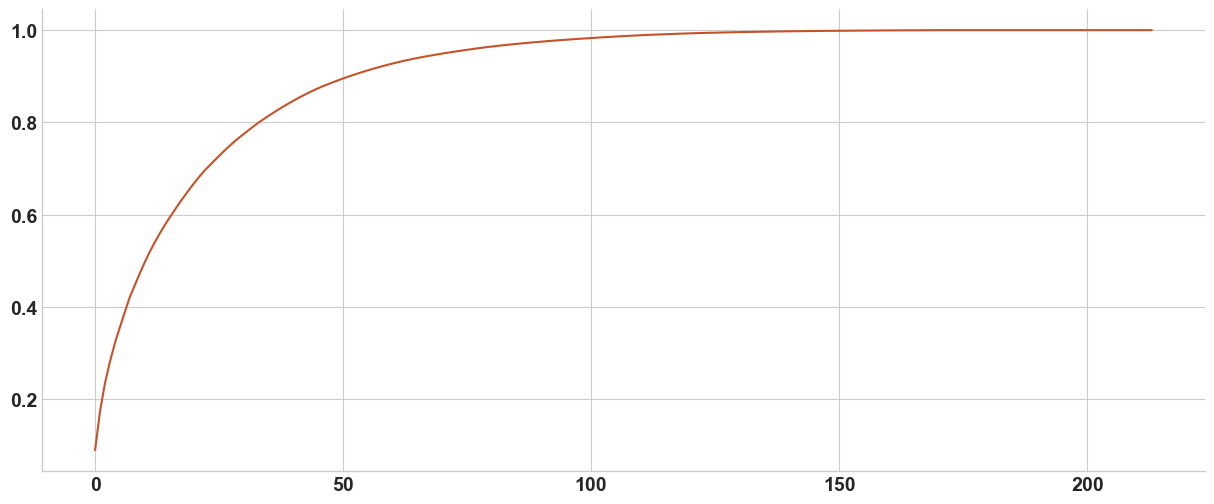

In [673]:
plt.plot(cumsum_pca)

In [674]:
pca_all = PCA(n_components=0.95)
X_train_pca_95 = pca_all.fit_transform(X_train_final_df)
X_test_pca_95 = pca_all.transform(X_test_final_df)

In [675]:
X_train_pca_95.shape

(1075, 72)

In [676]:
print(list(pca_all.get_feature_names_out(input_features=X_train_final_df.columns)))

['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca22', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33', 'pca34', 'pca35', 'pca36', 'pca37', 'pca38', 'pca39', 'pca40', 'pca41', 'pca42', 'pca43', 'pca44', 'pca45', 'pca46', 'pca47', 'pca48', 'pca49', 'pca50', 'pca51', 'pca52', 'pca53', 'pca54', 'pca55', 'pca56', 'pca57', 'pca58', 'pca59', 'pca60', 'pca61', 'pca62', 'pca63', 'pca64', 'pca65', 'pca66', 'pca67', 'pca68', 'pca69', 'pca70', 'pca71']


In [677]:
len(pca_all.get_feature_names_out(input_features=X_train_final_df.columns))

72

# __Modeling__

In [678]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

# Create and fit the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_pca_95, y_train)
linear_reg_predictions = linear_reg.predict(X_test_pca_95)




Linear Regression MAE: 17552.105464874112


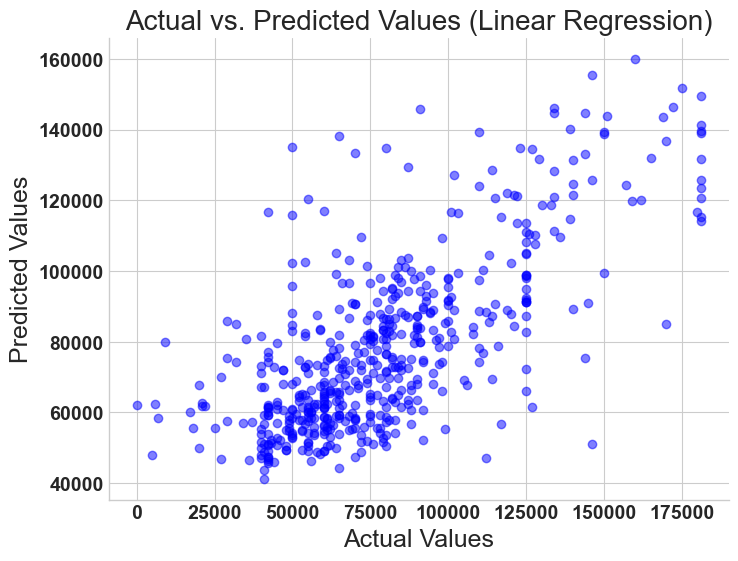

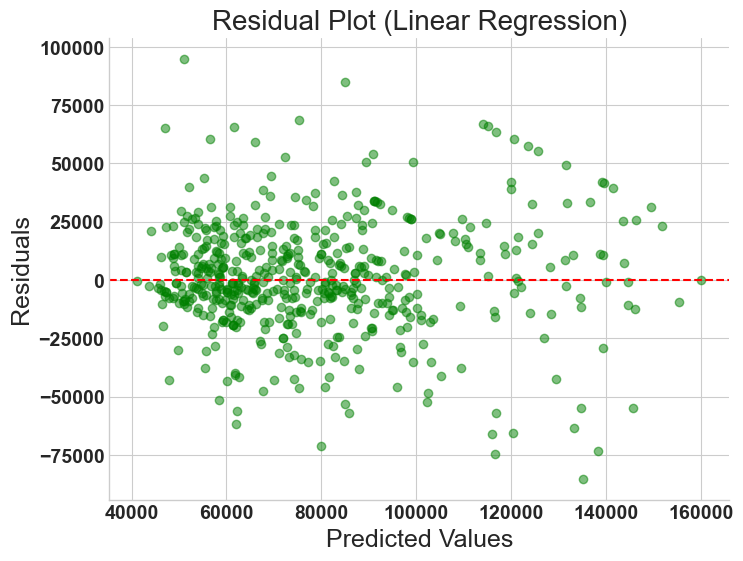

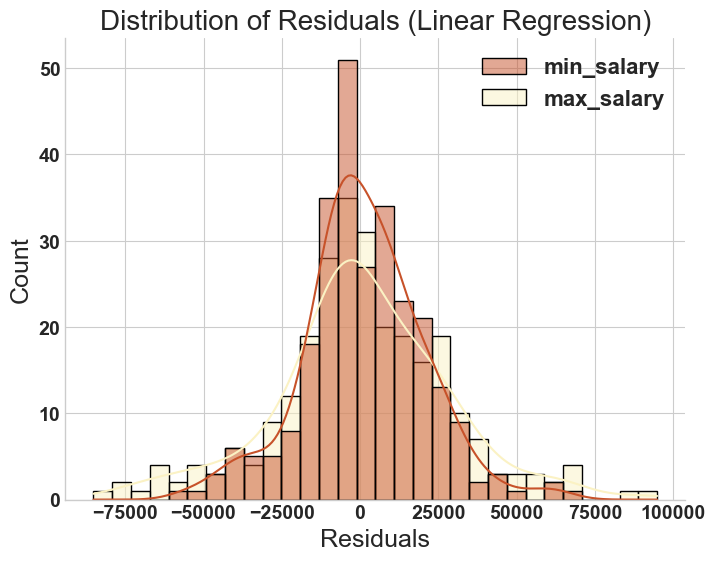

In [679]:
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, linear_reg_predictions)
print("Linear Regression MAE:", mae)

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_reg_predictions, color='blue', alpha=0.5)
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Residual plot
residuals = y_test - linear_reg_predictions
plt.figure(figsize=(8, 6))
plt.scatter(linear_reg_predictions, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (Linear Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals (Linear Regression)')
plt.xlabel('Residuals')
plt.show()

# Save Model

In [680]:
import joblib
joblib.dump(linear_reg,'linear_model.pkl')

['linear_model.pkl']

# test another models

In [681]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_pca_95, y_train)
linear_reg_predictions = linear_reg.predict(X_test_pca_95)

print("Linear Regression MAE:", mean_absolute_error(y_test, linear_reg_predictions))

Linear Regression MAE: 17552.105464874112


In [682]:
# Ridge Regression
ridge_reg = Ridge(alpha=1.5)
ridge_reg.fit(X_train_pca_95, y_train)
ridge_reg_predictions = ridge_reg.predict(X_test_pca_95)

print("Ridge Regression MAE:", mean_absolute_error(y_test, ridge_reg_predictions))

Ridge Regression MAE: 17519.32719768571


In [683]:
# Lasso Regression
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train_pca_95, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test_pca_95)
print("Lasso Regression MAE:", mean_absolute_error(y_test, lasso_reg_predictions))

Lasso Regression MAE: 17549.377049190018


In [684]:
# Lasso Regression
lasso_reg = Lasso(alpha=2.0)
lasso_reg.fit(X_train_final, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test_final)
print("Lasso Regression MAE:", mean_absolute_error(y_test, lasso_reg_predictions))

Lasso Regression MAE: 19135.544217502873


In [685]:
# Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train_pca_95, y_train)
random_forest_reg_predictions = random_forest_reg.predict(X_test_pca_95)

print("Random Forest Regressor MAE:", mean_absolute_error(y_test, random_forest_reg_predictions))

Random Forest Regressor MAE: 18618.905119354004


In [686]:
# Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train_final, y_train)
random_forest_reg_predictions = random_forest_reg.predict(X_test_final)

print("Random Forest Regressor MAE:", mean_absolute_error(y_test, random_forest_reg_predictions))

Random Forest Regressor MAE: 17946.44886887173


In [687]:
def skill_extractor(job_description):
    # Convert skills list to lowercase for case-insensitive matching
    skills_to_extract = [x.lower() for x in skills]

    # Create a dictionary to store extracted skills
    extracted_skills = {}

    for skill in skills_to_extract:
        # Create a pattern to match the current skill
        pattern = re.compile(fr'\b {re.escape(skill)} \b')
        
        # Find all matches for the current skill in the job description
        matches = re.findall(pattern, job_description)

        # Store the extracted skills in the dictionary
        extracted_skills[skill] = len(matches)

    return extracted_skills


df['extracted_skills'] = df['job_description'].apply(skill_extractor)
df1 = df.copy()

# Expand the dictionary of extracted skills into separate columns
df1 = pd.concat([df1['job_title'], df['extracted_skills'].apply(pd.Series)], axis=1)

# Drop the 'extracted_skills' column if no longer needed
df.drop(columns=['extracted_skills'], inplace=True)

In [688]:
grouped = df1.groupby('job_title')

most_required_skills = {}

for job_title, group in grouped:
    skill_frequencies = group.iloc[:, 1:].sum()
    
    sorted_skills = skill_frequencies.sort_values(ascending=False)
    
    top_skills = sorted_skills.head(20)
    
    most_required_skills[job_title] = top_skills.index.tolist()


In [689]:
most_required_skills

{'data analyst': ['data',
  'business',
  'analysis',
  'management',
  'communication',
  'analytical',
  'quality',
  'software',
  'research',
  'product',
  'data analysis',
  'training',
  'design',
  'education',
  'programming',
  'communication skills',
  'administration',
  'data management',
  'business intelligence',
  'project management'],
 'data scientist': ['data',
  'business',
  'analysis',
  'analytical',
  'software',
  'programming',
  'research',
  'communication',
  'product',
  'management',
  'engineering',
  'quality',
  'design',
  'data analysis',
  'communication skills',
  'training',
  'big data',
  'statistics',
  'education',
  'agile']}

In [690]:
print(skills)

['Computer Science', 'research', 'Economics', 'Computer Skills', 'management', 'Data Integration', 'business', 'Microsoft Excel', 'engineering', 'programming', 'microsoft office', 'Business Intelligence', 'Communication skills', 'Big Data', 'Research', 'teaching', 'javaScript', 'Mobile Development', 'Software Development', 'Computer Engineering', 'Sales Analysis', 'english', 'Project Management', 'Java', 'training', 'computer science', 'analysis', 'SQL', 'education', 'analytical', 'Software', 'Business Analysis', 'Training', 'Administration', 'Swift', 'Confluence', 'Python', 'Business Administration', 'Information Technology (IT)', 'quality', 'Product Owner', 'Amazon AWS', 'communication skills', 'Scrum', 'UX', 'Power BI', 'Data Warehouse', 'Microsoft Office', 'Kanban', 'Sass', 'big data', 'Analysis', 'MySQL', 'economics', 'Product', 'Core Data', 'business administration', 'ETL', 'Core Animation', 'SPSS', 'BI', 'Jira', 'Data', 'Linux', 'Statistics', 'Objective-C', 'communication', 'SAS